In [1]:
import pandas as pd
import numpy as np 
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('RebateModelData.csv')
# data_set
# data_set.isnull().sum()

In [3]:
X = ['QUANTITY', 'FINAL_REVENUE', 'LIST_PRICE']
Y = ['DISCOUNT'] 

In [4]:
# train, test = train_test_split(data_set, test_size=0.205878, random_state=None, shuffle=False)
train, test = train_test_split(data_set, test_size=0.1, random_state=None, shuffle=False)

In [5]:
train[X] = train[X] / train[X].max()

In [6]:
test = test[:1000]

In [7]:
test[X] = test[X] / test[X].max()
# test[X] = test[X] / X_max

In [8]:
data_mapper = DataFrameMapper([
                             (['QUANTITY', 'FINAL_REVENUE', 'LIST_PRICE'], preprocessing.StandardScaler()),
                             ])

In [9]:
pipeline_obj = pipeline.Pipeline([
        ('mapper', data_mapper),
        ("model", ensemble.RandomForestRegressor())
    ])

In [10]:
# data_set.columns

In [11]:
pipeline_obj.fit(train[X], train[Y])

C:\Users\azaincharolia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['QUANTITY', 'FINAL_REVENUE',
                                             'LIST_PRICE'],
                                            StandardScaler())])),
                ('model', RandomForestRegressor())])

In [12]:
# result_test = pipeline_obj.predict(test[X]) * Y_max.values
result_test = pipeline_obj.predict(test[X])

In [13]:
# result_test

In [14]:
mse_discount = metrics.mean_squared_error(test[Y].values, result_test)
mse_discount

25.245237046102353

In [15]:
# mse_rebate = metrics.mean_squared_error(test[Y].values[:,1], result_test[:,1])
# mse_rebate

In [16]:
mae_discount = metrics.mean_absolute_error(test[Y].values, result_test)
mae_discount

3.9021252073917

In [17]:
# mae_rebate = metrics.mean_absolute_error(test[Y].values[:,1], result_test[:,1])
# mae_rebate

In [18]:
# plt.plot(result_test)

In [19]:
# plt.plot(test[Y].values)

Text(0.5, 1.0, 'Discount')

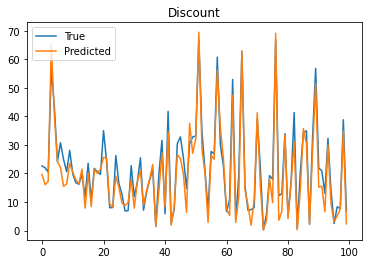

In [20]:
plt.figure()
plt.plot(result_test[:100])
plt.plot(test[Y].values[:100])
plt.legend(['True', 'Predicted'])
plt.title('Discount')

In [21]:
# plt.figure()
# plt.plot(result_test[:100,1])
# plt.plot(test[Y].values[:100,1])
# plt.legend(['True', 'Predicted'])
# plt.title('Rebate')

Text(0.5, 1.0, 'Discount')

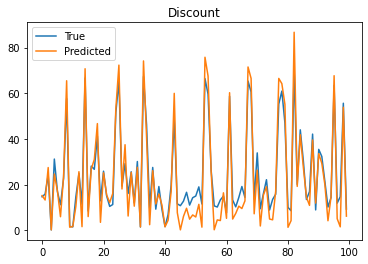

In [22]:
plt.figure()
plt.plot(result_test[-100:])
plt.plot(test[Y].values[-100:])
plt.legend(['True', 'Predicted'])
plt.title('Discount')

In [23]:
# plt.figure()
# plt.plot(result_test[-100:,1])
# plt.plot(test[Y].values[-100:,1])
# plt.legend(['True', 'Predicted'])
# plt.title('Rebate')

In [24]:
import joblib

In [25]:
joblib.dump(pipeline_obj, 'RFModelForDiscount.pkl')

['RFModelForDiscount.pkl']

In [26]:
model_test = joblib.load('RFModelForDiscount.pkl')

In [27]:
model_test.predict(data_set[X])

array([35.57214868, 35.57214868, 35.57214868, ..., 35.57214868,
       35.57214868, 35.57214868])

In [28]:
# ['QUANTITY', 'FINAL_REVENUE', 'DISCOUNT', 'REBATES', 'LIST_PRICE', 'RATE', 'SALE_PRICE', 'TOTAL_COST']

my_dict = {}
my_dict['QUANTITY'] = 1
my_dict['FINAL_REVENUE'] = 2
my_dict['LIST_PRICE'] = 3

In [29]:
testData = pd.DataFrame({'x':my_dict}).transpose()

In [30]:
testData

,FINAL_REVENUE,LIST_PRICE,QUANTITY
x,2,3,1


In [31]:
model_test.predict(testData)[0]

35.57214867606999